In [2]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os

In [16]:
cwd=os.getcwd()

path_data = cwd + '/HzTable_MM_BC03.dat'
path_sys = cwd + '/data_MM20.dat'

z, H, sig = np.genfromtxt(path_data, comments='#', usecols=(0,1,2), unpack=True, delimiter=',')

zmod, imf, slib, sps, spsooo = np.genfromtxt(path_sys, comments='#', usecols=(0,1,2,3,4), unpack=True)

# These are data without systematic
data = np.c_[z,H,sig]
print("      z   ","         H(z)   ","       err")
print(data)


      z             H(z)           err
[[1.7910000e-01 7.4910000e+01 3.8069262e+00]
 [1.9930000e-01 7.4960000e+01 4.9001352e+00]
 [3.5190000e-01 8.2780000e+01 1.3948430e+01]
 [3.8020000e-01 8.3000000e+01 1.3540000e+01]
 [4.0040000e-01 7.6970000e+01 1.0180000e+01]
 [4.2470000e-01 8.7080000e+01 1.1240000e+01]
 [4.4970000e-01 9.2780000e+01 1.2900000e+01]
 [4.7830000e-01 8.0910000e+01 9.0440000e+00]
 [5.9290000e-01 1.0380000e+02 1.2497520e+01]
 [6.7970000e-01 9.1600000e+01 7.9618720e+00]
 [7.8120000e-01 1.0450000e+02 1.2195150e+01]
 [8.7540000e-01 1.2510000e+02 1.6700850e+01]
 [1.0370000e+00 1.5370000e+02 1.9673600e+01]
 [1.3630000e+00 1.6000000e+02 3.2630000e+01]
 [1.9650000e+00 1.8650000e+02 4.9580000e+01]]


<ErrorbarContainer object of 3 artists>

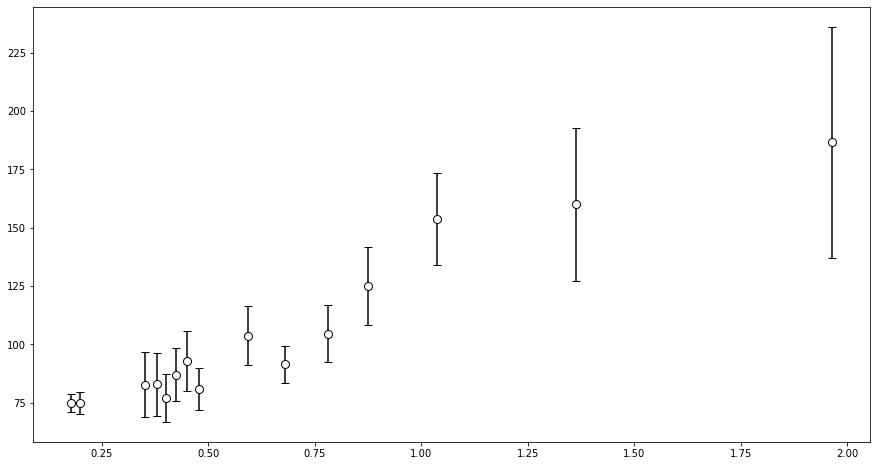

In [18]:
plt.rcParams['figure.figsize'] = (15,8)
plt.errorbar(z, H, sig, fmt='o', color='k', mfc='white', elinewidth=1.5, ms=8, capsize=4)

In [19]:
cov_mat_diag = np.zeros((len(z), len(z)), dtype='float64') 

for i in range(len(z)):
	cov_mat_diag[i,i] = sig[i]**2

imf_intp = np.interp(z, zmod, imf)/100
slib_intp = np.interp(z, zmod, slib)/100
sps_intp = np.interp(z, zmod, sps)/100
spsooo_intp = np.interp(z, zmod, spsooo)/100

cov_mat_imf = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_slib = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_sps = np.zeros((len(z), len(z)), dtype='float64')
cov_mat_spsooo = np.zeros((len(z), len(z)), dtype='float64')

for i in range(len(z)):
	for j in range(len(z)):
		cov_mat_imf[i,j] = H[i] * imf_intp[i] * H[j] * imf_intp[j]
		cov_mat_slib[i,j] = H[i] * slib_intp[i] * H[j] * slib_intp[j]
		cov_mat_sps[i,j] = H[i] * sps_intp[i] * H[j] * sps_intp[j]
		cov_mat_spsooo[i,j] = H[i] * spsooo_intp[i] * H[j] * spsooo_intp[j]

In [20]:
# The covarince matrix including all systematics is
cov_mat = cov_mat_spsooo+cov_mat_imf+cov_mat_diag
inv_cov_mat = inv(cov_mat)